<a href="https://www.kaggle.com/code/suyashkapil/fake-news-detection-nlp?scriptVersionId=119364890" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Fake News Detection**
* Detecting Fake news using a dataset containing true and false news.

# **Importing Libraries**

In [42]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import plotly.express as px
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers
import string
import tensorflow as tf

# **Loading the Datasets**

In [2]:
fake_news = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/Fake.csv')
true_news = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')
fake_news.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [3]:
true_news.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [4]:
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [5]:
true_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [6]:
true_news['True'] = 1
fake_news['True'] = 0

In [7]:
true_news.drop(columns=['title','subject','date'])

,text,True
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [8]:
fake_news.drop(columns=['title','subject','date'])

,text,True
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
23476,21st Century Wire says As 21WIRE reported earl...,0
23477,21st Century Wire says It s a familiar theme. ...,0
23478,Patrick Henningsen 21st Century WireRemember ...,0
23479,21st Century Wire says Al Jazeera America will...,0


# **Joining the true and fake news datasets to form one dataset with 1 and 0 labels**

In [9]:
dataset = pd.concat([true_news, fake_news], axis=0)
clean_data = dataset.drop(columns=['title','subject','date'])
clean_data

,text,True
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...
23476,21st Century Wire says As 21WIRE reported earl...,0
23477,21st Century Wire says It s a familiar theme. ...,0
23478,Patrick Henningsen 21st Century WireRemember ...,0
23479,21st Century Wire says Al Jazeera America will...,0


In [10]:
clean_data.dtypes

text    object
True     int64
dtype: object

# **Subjects**

In [11]:
sub = dataset.groupby('subject').count()['title']
print(sub)
plt.figure(figsize=(10,10))
px.pie(dataset['subject'],names=dataset['subject'],title='Subject')

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: title, dtype: int64


<Figure size 720x720 with 0 Axes>

# **Cleaning Data for NLP**

In [12]:
x = clean_data.iloc[:,0]
y = clean_data['True']
print('x : \n' ,x[:10],'\n y :\n' ,y[:10])

x : 
 0    WASHINGTON (Reuters) - The head of a conservat...
1    WASHINGTON (Reuters) - Transgender people will...
2    WASHINGTON (Reuters) - The special counsel inv...
3    WASHINGTON (Reuters) - Trump campaign adviser ...
4    SEATTLE/WASHINGTON (Reuters) - President Donal...
5    WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...
6    WEST PALM BEACH, Fla (Reuters) - President Don...
7    The following statements were posted to the ve...
8    The following statements were posted to the ve...
9    WASHINGTON (Reuters) - Alabama Secretary of St...
Name: text, dtype: object 
 y :
 0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: True, dtype: int64


In [13]:
para = x.tolist()
words = " ".join(para)
chars = [char for char in words if char not in string.punctuation ]

In [14]:
wordgroup = "".join(chars)
wordgroup[0:140]

'WASHINGTON Reuters  The head of a conservative Republican faction in the US Congress who voted this month for a huge expansion of the nation'

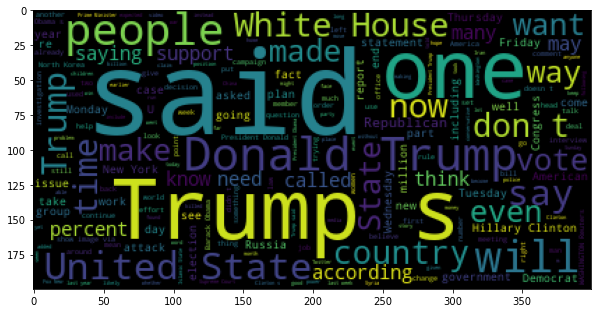

In [15]:
plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(wordgroup))

In [16]:
print('number of words : ',len([word for word in wordgroup.split()]))

number of words :  18140003


In [17]:
wordgroup.split()[0:10]

['WASHINGTON',
 'Reuters',
 'The',
 'head',
 'of',
 'a',
 'conservative',
 'Republican',
 'faction',
 'in']

 # **Original Dataset of 45000 entries is giving a memory allocation error. Using a sample could help. Please suggest a better way than this to decrease processing time (using TPUs didn't help) if you have any idea. 3000 entries sample had 1.2 million words and it is still taking a lot of time to process. Would love to know about better methods**

# **Sampling**

In [18]:
samp = clean_data.sample(n=3000)
samp

,text,True
20316,Wow there are no words for the hate these peop...,0
5916,President Obama just smacked down an attempt b...,0
1830,WASHINGTON (Reuters) - President Donald Trump’...,1
14122,PARIS (Reuters) - France demanded on Wednesday...,1
17823,Liberal actor and close friend of Hillary Clin...,0
...,...,...
1147,WASHINGTON (Reuters) - Republican U.S. Represe...,1
17867,Trump administration officials are mulling an ...,0
9151,Has-been liberal celebrities took to twitter t...,0
3642,When Fox News host Stuart Varney bragged about...,0


In [19]:
truth_dist = samp.groupby('True').count()
truth_dist

,text
True,
0,1570
1,1430


# **Cleaning the sample data**

In [20]:
para_samp = samp.iloc[:,0].tolist()
group =" ".join(para_samp)
chars = [char for char in group.split() if char not in string.punctuation]
print('Number of words in this 3000 entry sample data : ',len(" ".join(chars).split()))

Number of words in this 3000 entry sample data :  1229641


In [21]:
word_samp = " ".join(chars).split()
words = [word.lower() for word in word_samp]
words[0:20]

['wow',
 'there',
 'are',
 'no',
 'words',
 'for',
 'the',
 'hate',
 'these',
 'people',
 'walk',
 'around',
 'with',
 'every',
 'day',
 'check',
 'out',
 'these',
 'unbelievable',
 'tweets']

In [22]:
len(words)

1229641

In [23]:
samp.dtypes

text    object
True     int64
dtype: object

In [24]:
imp_word =[word.lower() for word in words if word not in stopwords.words('english')]
imp_word[0:20]

['wow',
 'words',
 'hate',
 'people',
 'walk',
 'around',
 'every',
 'day',
 'check',
 'unbelievable',
 'tweets',
 'celebrating',
 'murder',
 'innocent',
 'dallas',
 'police',
 'officers.',
 'officers',
 'risking',
 'lives']

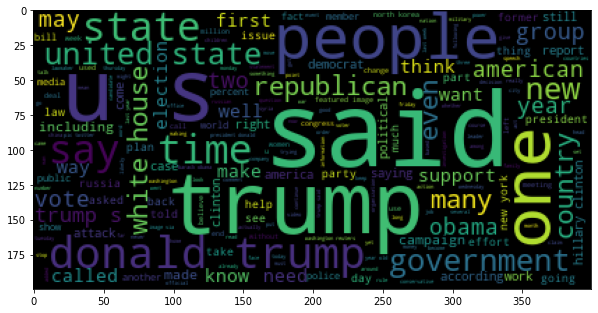

In [25]:
plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(" ".join(imp_word)))

# **Vectorizing sample data**

In [26]:
vect = CountVectorizer().fit_transform(para_samp).toarray()
vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [27]:
vect_data = pd.DataFrame(vect)
vect_data

,0,1,2,3,4,5,6,7,8,9,...,37348,37349,37350,37351,37352,37353,37354,37355,37356,37357
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
vect_data.dtypes

0        int64
1        int64
2        int64
3        int64
4        int64
         ...  
37353    int64
37354    int64
37355    int64
37356    int64
37357    int64
Length: 37358, dtype: object

# **Training the sample clean data**

In [35]:
x1 = vect_data
y = samp['True']
x_train,x_test,y_train,y_test = train_test_split(x1,y, test_size = 0.2)

# **Building an Artificial Neural Network**

2023-02-16 09:50:42.239164: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 717273600 exceeds 10% of free system memory.


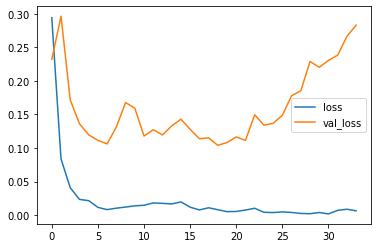

In [50]:
ES = tf.keras.callbacks.EarlyStopping(
    min_delta = 0.001 ,
    patience = 15 ,
    restore_best_weights = True
)
model = tf.keras.Sequential([
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(100, activation = 'relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(
    optimizer = 'adam',
    metrics = ['binary_accuracy'],
    loss = 'binary_crossentropy'
)
truth = model.fit(tf.cast(x_train , tf.float32),y_train, 
                  validation_data =(x_test,y_test),
                  verbose = 0,
                 callbacks = [ES],
                  batch_size = 100,
                 epochs = 500)
history_df = pd.DataFrame(truth.history)
history_df.loc[:, ['loss', 'val_loss']].plot();